In [2]:
# The goal of this assignment is to the code the plotting of the velocity dispersion
# of dark matter particles within the Jacobi Radius of M33 over time and plotting
# the jacobi radii itself overtime.

In [5]:
# numpy provides powerful multi-dimensional arrays 
import numpy as np
# units
import astropy.units as u
# import previous HW functions
from ReadFile import Read
import matplotlib.pyplot as plt
import os

In [7]:
# Rj = r*(Msat/2/Mmw)**(1/3)
# This function is a modified function from Lab 4 from class
def jacobi_radius(m_sat,r,m_host):
    """ Function that determines the jacobi radius for a satellite 
    on a circular orbit about a host, where the host
    is assumed to be an isothermal sphere halo
    
    Inputs:
        m_sat : astropy quantity
            Mass of the satellite galaxy in Msun 
        r : astropy quantity 
            Distance of the satellite from the host in kpc
        m_host: astropy quantity 
            Mass of the host galaxy in Msun within r in Msun
        
    Outputs:
        jacobi_radius: astropy quantity
            The radius at which a satellite can be disturbed by 
            tidal forces of the host galaxy
    """
    Rj = r*(m_sat/(2*m_host))**(1/3)
    return Rj

In [37]:
# Function to calculate velocity dispersion for particles within a specific radius
def velocity_dispersion_within_radius(vx, vy, vz, positions, r_jacobi):
    """
    Calculate the velocity dispersion for particles within the Jacobi radius.

    Parameters:
        vx, vy, vz: array-like
            Velocity components of particles in km/s.
        positions: array-like
            Positions of particles in kpc, shape (N, 3).
        r_jacobi: astropy Quantity
            Jacobi radius in kpc.

    Returns:
        sigma: float
            Velocity dispersion in km/s.
    """
    # Calculate distances from the host galaxy
    distances = np.linalg.norm(positions, axis=1) * u.kpc

    # Select particles within the Jacobi radius
    mask = distances <= r_jacobi

    # Extract velocities of selected particles
    selected_vx = vx[mask]
    selected_vy = vy[mask]
    selected_vz = vz[mask]

    # Calculate mean velocities
    vmean_x = np.mean(selected_vx)
    vmean_y = np.mean(selected_vy)
    vmean_z = np.mean(selected_vz)

    # Calculate velocity dispersions
    dispersion_x = np.mean((selected_vx - vmean_x) ** 2)
    dispersion_y = np.mean((selected_vy - vmean_y) ** 2)
    dispersion_z = np.mean((selected_vz - vmean_z) ** 2)

    # Total velocity dispersion
    sigma = np.sqrt(dispersion_x + dispersion_y + dispersion_z)

    return sigma


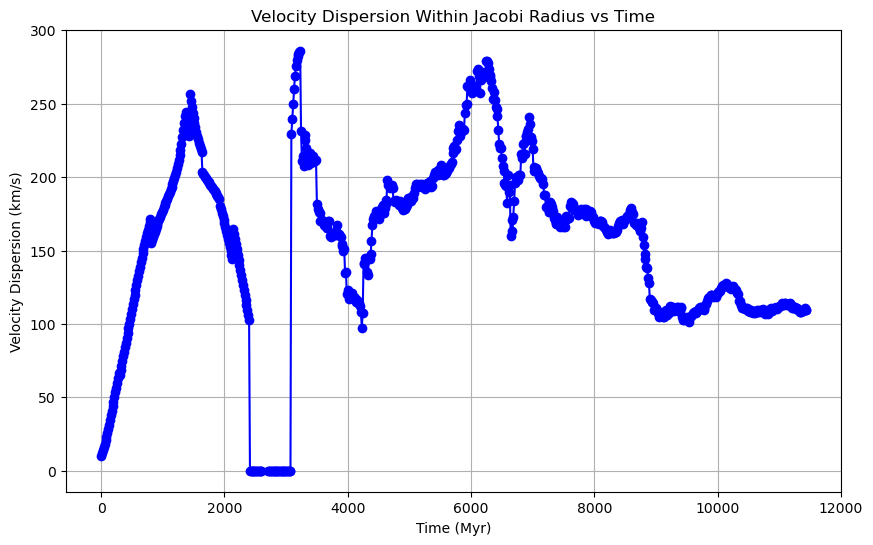

In [39]:
import os


def plot_velocity_dispersion(start_num, end_num, m_sat, m_host, prefix="M33_", suffix=".txt", folder=""):
    """
    Loops through multiple files with a specified prefix in a folder, calculates the velocity dispersion 
    within the Jacobi radius, and plots the results.

    Parameters:
        start_num, end_num: int
            Range of file numbers.
        m_sat: astropy Quantity
            Mass of the satellite galaxy in Msun.
        m_host: astropy Quantity
            Mass of the host galaxy in Msun within r in Msun.
        prefix: str
            The prefix for the filename.
        suffix: str
            The type of file.
        folder: str
            Optional subfolder where files are located.

    Outputs:
        A plot of velocity dispersion over time.
    """
    times = []
    dispersions = []

    for i in range(start_num, end_num + 1):
        filename = os.path.join(folder, f"{prefix}{i:03d}{suffix}")

        # Read the data file
        time, total, data = Read(filename)

        # Extract positions
        positions = np.column_stack((data['x'], data['y'], data['z']))  # in kpc

        # Compute the distance of the satellite from the host galaxy
        r = np.linalg.norm(np.mean(positions, axis=0)) * u.kpc

        # Calculate Jacobi radius
        r_jacobi = jacobi_radius(m_sat, r, m_host)

        # Extract velocity components
        vx = data['vx']
        vy = data['vy']
        vz = data['vz']

        # Calculate the velocity dispersion
        sigma = velocity_dispersion_within_radius(vx, vy, vz, positions, r_jacobi)

        # Store the time and velocity dispersion
        times.append(time.value)  # Assuming time is an astropy Quantity in Myr
        dispersions.append(sigma)

    # Convert lists to arrays for plotting
    times = np.array(times)
    dispersions = np.array(dispersions)

    # Filter out any NaN values
    valid_indices = ~np.isnan(dispersions)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(times, dispersions, marker='o', linestyle='-', color='b')
    plt.xlabel('Time (Myr)')
    plt.ylabel('Velocity Dispersion (km/s)')
    plt.title('Velocity Dispersion Within Jacobi Radius vs Time')
    plt.grid(True)
    plt.show()
start_num = 0    
end_num = 801   
m_sat = 18.7e10 * u.Msun   
m_host = 192e10 * u.Msun  

plot_velocity_dispersion(start_num, end_num, m_sat, m_host, folder="M33")

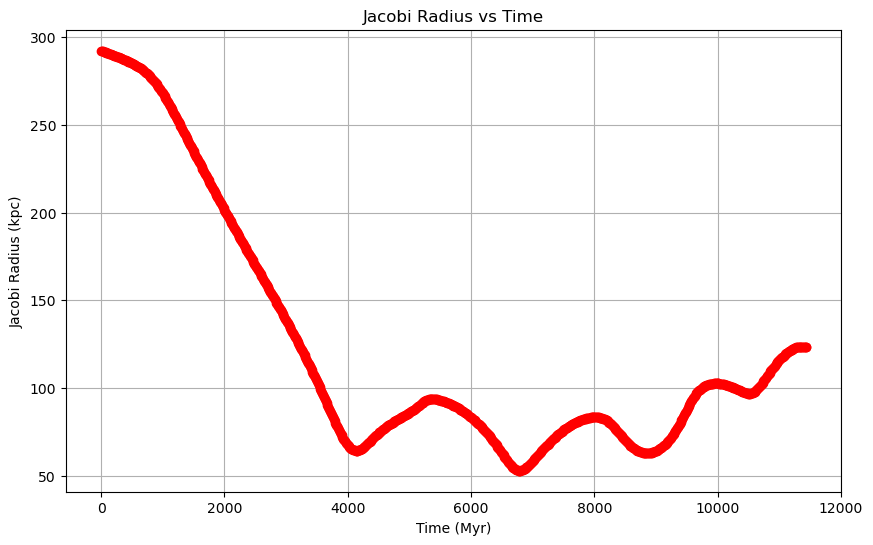

In [8]:
# Plotting function specifically for the Jacobi radius and how it is changing over time
def plot_jacobi_radius(start_num, end_num, m_sat, m_host, prefix="M33_", suffix=".txt", folder=""):
    """
    Loops through multiple files with a specified prefix in a folder, calculates the Jacobi radius 
    for the satellite galaxy, and plots the results.

    Parameters:
        start_num, end_num: int
            Range of file numbers.
        m_sat: astropy Quantity
            Mass of the satellite galaxy in Msun.
        m_host: astropy Quantity
            Mass of the host galaxy in Msun within r in Msun.
        prefix: str
            The prefix for the filename.
        suffix: str
            The type of file.
        folder: str
            Optional subfolder where files are located.

    Outputs:
        A plot of Jacobi radius over time.
    """
    times = []
    jacobi_radii = []

    for i in range(start_num, end_num + 1):
        filename = os.path.join(folder, f"{prefix}{i:03d}{suffix}")

        # Read the data file
        time, total, data = Read(filename)

        # Extract positions
        positions = np.column_stack((data['x'], data['y'], data['z']))  # in kpc

        # Compute the distance of the satellite from the host galaxy
        r = np.linalg.norm(np.mean(positions, axis=0)) * u.kpc

        # Calculate Jacobi radius
        r_jacobi = jacobi_radius(m_sat, r, m_host)

        # Store the time and Jacobi radius
        times.append(time.value)  # Assuming time is an astropy Quantity in Myr
        jacobi_radii.append(r_jacobi.value)  # Store Jacobi radius in kpc

    # Convert lists to arrays for plotting
    times = np.array(times)
    jacobi_radii = np.array(jacobi_radii)

    # Filter out any NaN values
    valid_indices = ~np.isnan(jacobi_radii)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(times[valid_indices], jacobi_radii[valid_indices], marker='o', linestyle='-', color='r')
    plt.xlabel('Time (Myr)')
    plt.ylabel('Jacobi Radius (kpc)')
    plt.title('Jacobi Radius vs Time')
    plt.grid(True)
    plt.show()
start_num = 0    
end_num = 801   
m_sat = 18.7e10 * u.Msun   
m_host = 192e10 * u.Msun  

plot_jacobi_radius(start_num, end_num, m_sat, m_host, folder="M33")

In [ ]:
# Take a effective mass between M31 and MW for the future